In [1]:
#******************************************************
#
#						Session 3
#		Duplicates, Categorial Variable Relationships &
#					Extreme values
#
#******************************************************

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy.stats import zscore
from statsmodels.graphics.gofplots import qqplot
from AccidentInput import file_inputl, combine_data

import warnings
warnings.filterwarnings("ignore")

# Set style for seaborn
sns.set(style="whitegrid")


In [2]:
# Set working directory
traindir = "C:/Users/jgh6ds/Desktop/Independent/Sessions 2-5 Data and Visualization/TrainData"
sourcedir = "C:/Users/jgh6ds/Desktop/Independent/Sessions 2-5 Data and Visualization"

acts = file_inputl(traindir)
comvar = set(acts[0].columns).intersection(set(acts[7].columns))
totacts = combine_data(acts, list(comvar))

# Get dimensions of the combined dataframe
print(totacts.shape)

(65465, 145)


In [3]:
# Setup Categorical Variables

# Accident type
totacts['TYPE'] = totacts['TYPE'].astype('category')
totacts['TYPE'] = totacts['TYPE'].cat.rename_categories(["Derailment", "HeadOn", "Rearend", "Side", "Raking", "BrokenTrain", "Hwy-Rail", "GradeX", "Obstruction", "Explosive", "Fire","Other","SeeNarrative" ])

# Drop rows with NaN values in TYPEQ
totacts = totacts.dropna(subset=['TYPEQ'])

# Convert TYPEQ to category and rename categories
totacts['TYPEQ'] = totacts['TYPEQ'].astype('category')

# Accident cause
totacts['Cause'] = totacts['CAUSE'].apply(lambda x: x[0] if pd.notnull(x) else None)
totacts['Cause'] = totacts['Cause'].astype('category')


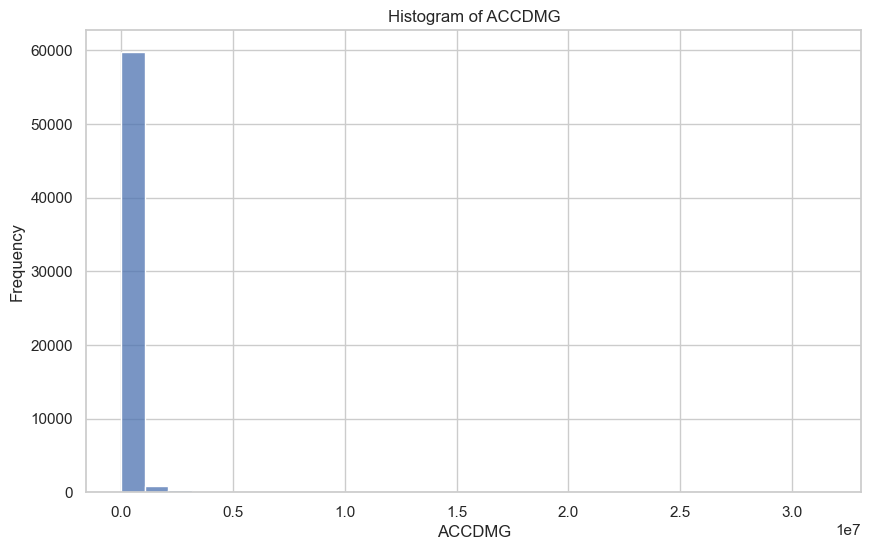

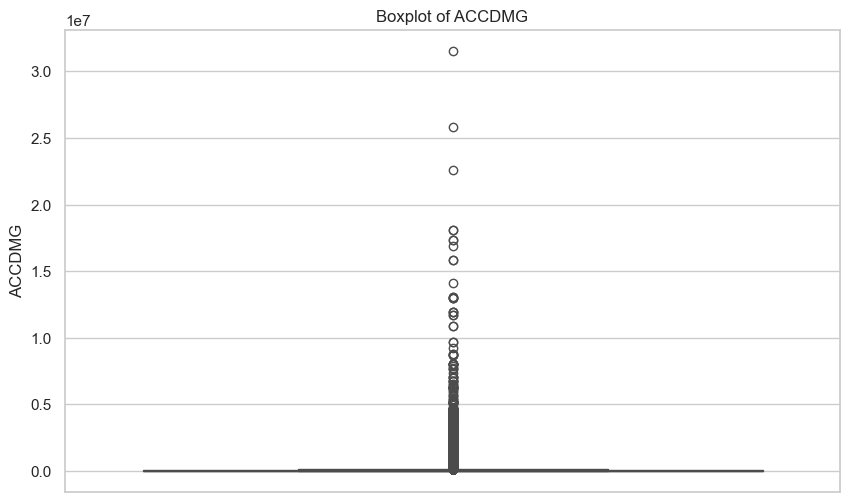

Proportion of extreme accidents: 0.2500040927917751
Proportion of extreme costs: 0.8458156620042638
Number of duplicates: 2253
Number of unique entries after removing duplicates: 13221


In [4]:
# Histogram for ACCDMG
plt.figure(figsize=(10,6))
sns.histplot(totacts['ACCDMG'], bins=30)
plt.xlabel('ACCDMG')
plt.ylabel('Frequency')
plt.title('Histogram of ACCDMG')
plt.show()

# Boxplot for ACCDMG
plt.figure(figsize=(10,6))
sns.boxplot(y=totacts['ACCDMG'])
plt.title('Boxplot of ACCDMG')
plt.show()

# Extract extreme data points
upper_whisker = np.percentile(totacts['ACCDMG'].dropna(), 75) + 1.5 * zscore(totacts['ACCDMG'].dropna()).std()
xdmg = totacts[totacts['ACCDMG'] > upper_whisker]

# Proportion of accidents and costs
extreme_sum = xdmg['ACCDMG'].sum()
total_sum = totacts['ACCDMG'].sum()
print(f'Proportion of extreme accidents: {len(xdmg) / len(totacts)}')
print(f'Proportion of extreme costs: {extreme_sum / total_sum}')

# Checking for duplicates
duplicates = xdmg[xdmg.duplicated(subset=['YEAR', 'MONTH', 'DAY', 'TIMEHR', 'TIMEMIN'])]
print(f'Number of duplicates: {len(duplicates)}')

# Remove duplicates
xdmgnd = xdmg.drop_duplicates(subset=['INCDTNO', 'YEAR', 'MONTH', 'DAY', 'TIMEHR', 'TIMEMIN'])
print(f'Number of unique entries after removing duplicates: {len(xdmgnd)}')


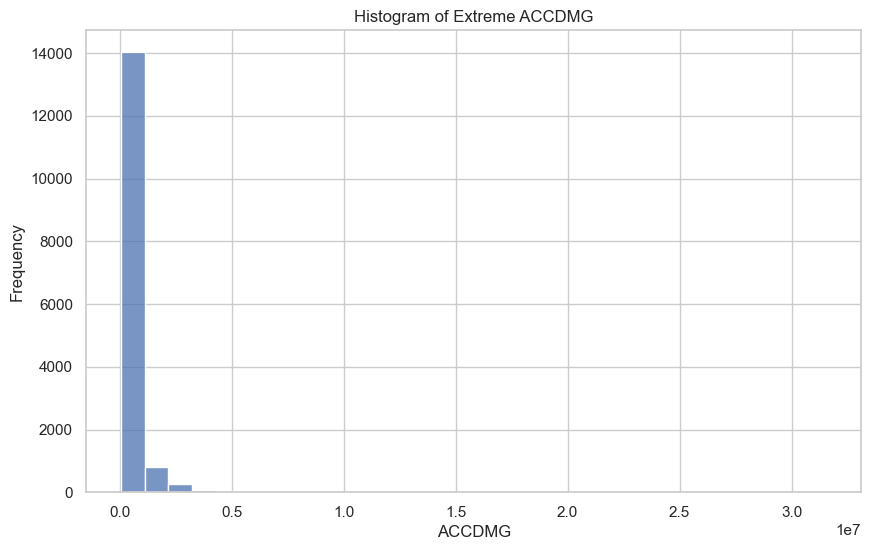

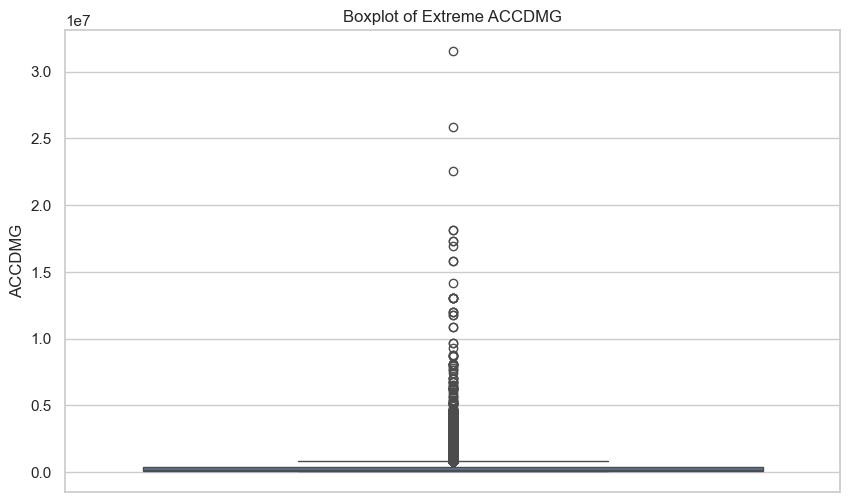

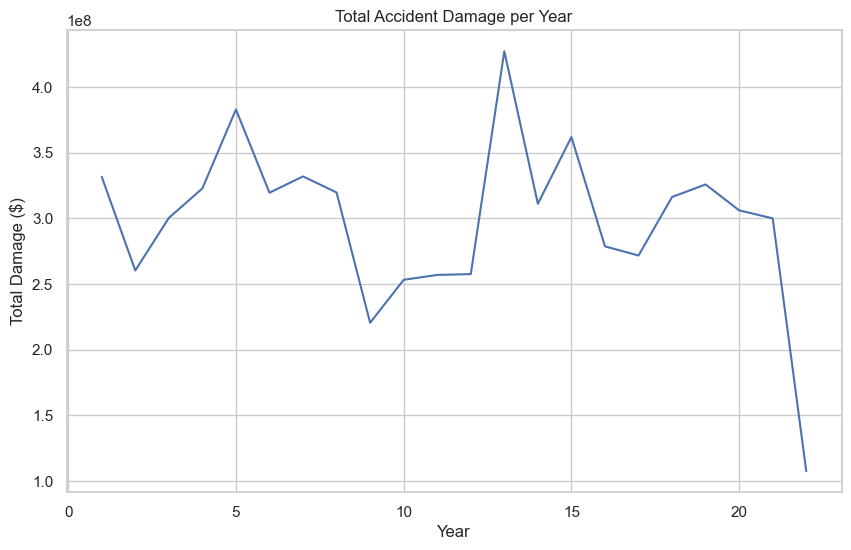

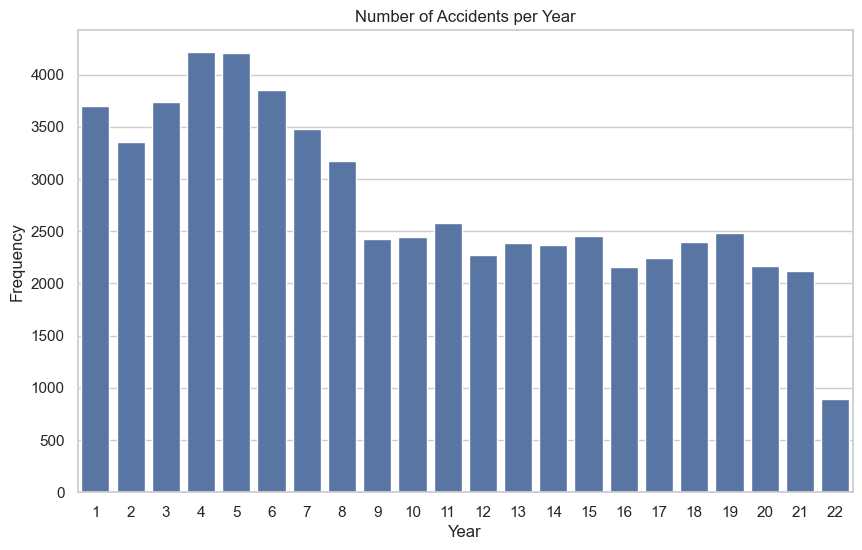

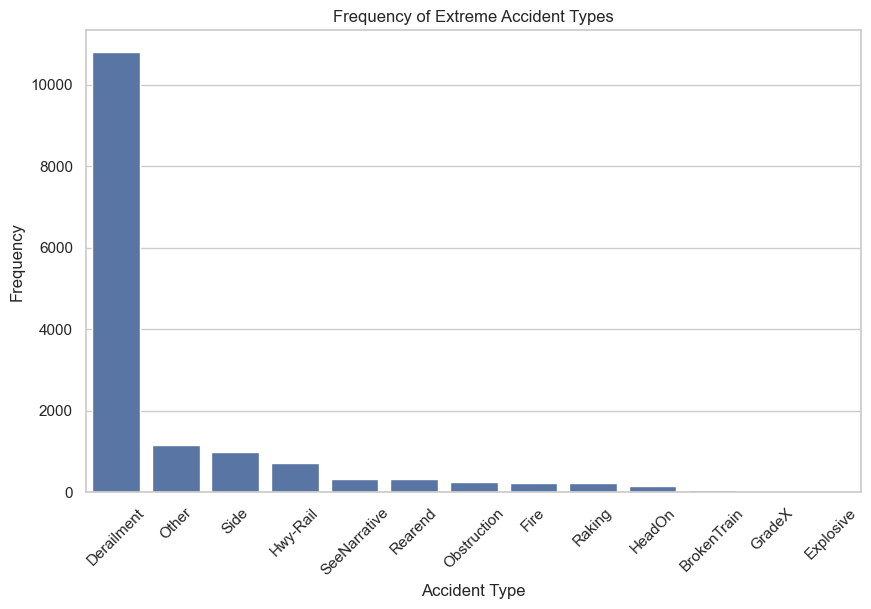

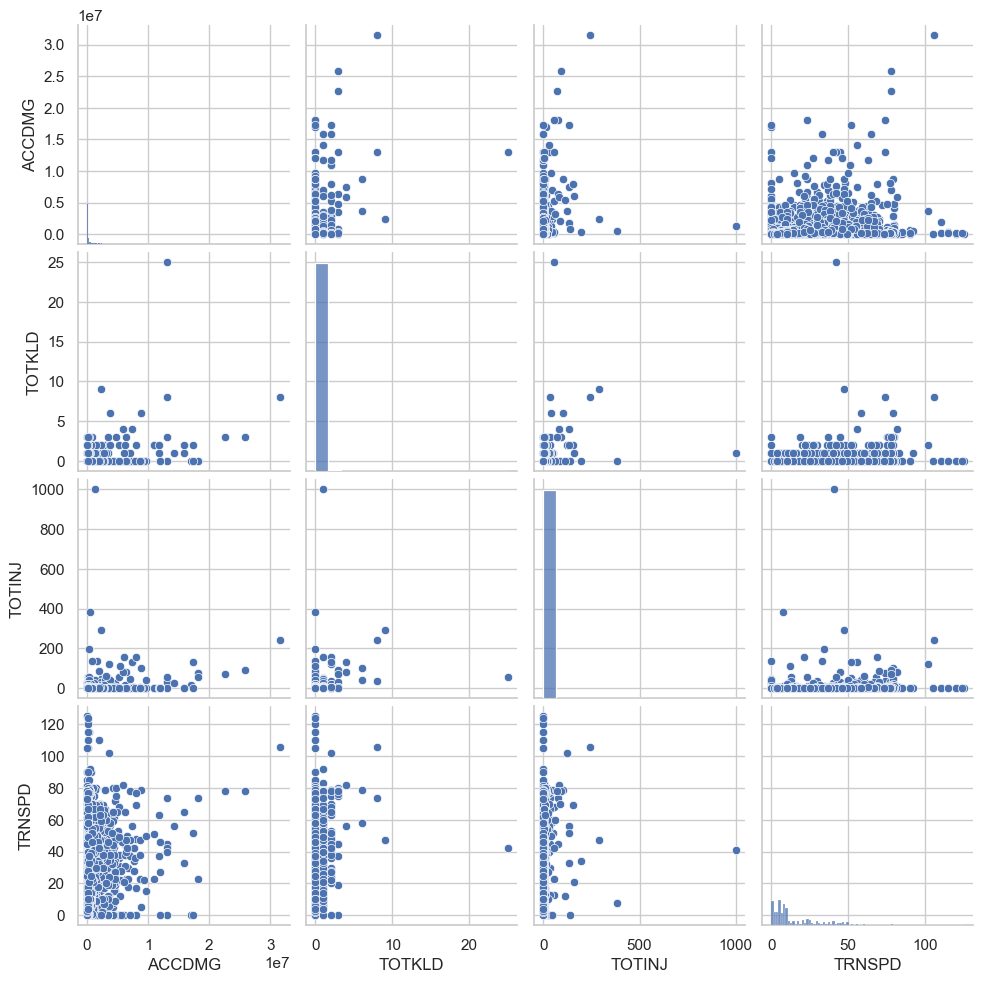

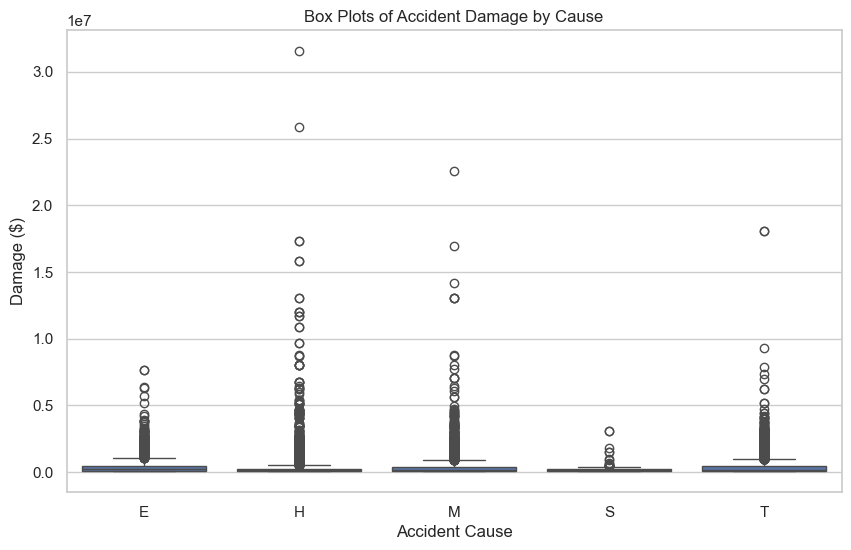

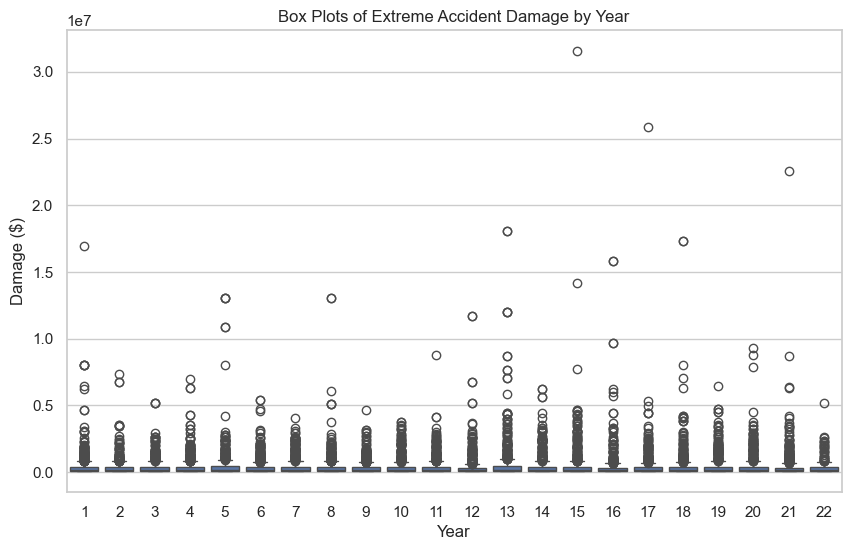

In [5]:
# Histogram of extreme accidents
plt.figure(figsize=(10,6))
sns.histplot(xdmg['ACCDMG'], bins=30)
plt.xlabel('ACCDMG')
plt.ylabel('Frequency')
plt.title('Histogram of Extreme ACCDMG')
plt.show()

# Boxplot of extreme accidents
plt.figure(figsize=(10,6))
sns.boxplot(y=xdmg['ACCDMG'])
plt.title('Boxplot of Extreme ACCDMG')
plt.show()

# Time series of damages per year
df = xdmg.groupby('YEAR')['ACCDMG'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='YEAR', y='ACCDMG')
plt.title('Total Accident Damage per Year')
plt.xlabel('Year')
plt.ylabel('Total Damage ($)')
plt.show()

# Number of accidents per year
plt.figure(figsize=(10,6))
sns.countplot(data=totacts, x='YEAR')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Frequency of accident types
plt.figure(figsize=(10,6))
sns.countplot(data=xdmg, x='TYPE', order=xdmg['TYPE'].value_counts().index)
plt.title('Frequency of Extreme Accident Types')
plt.xlabel('Accident Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Scatterplot matrix
sns.pairplot(xdmg[['ACCDMG', 'TOTKLD', 'TOTINJ', 'TRNSPD']])
plt.show()

# Boxplot by Cause
plt.figure(figsize=(10,6))
sns.boxplot(data=xdmg, x='Cause', y='ACCDMG')
plt.title('Box Plots of Accident Damage by Cause')
plt.xlabel('Accident Cause')
plt.ylabel('Damage ($)')
plt.show()

# Boxplot with jitter
plt.figure(figsize=(10,6))
sns.boxplot(data=xdmg, x='YEAR', y='ACCDMG')
plt.title('Box Plots of Extreme Accident Damage by Year')
plt.xlabel('Year')
plt.ylabel('Damage ($)')
plt.show()


In [6]:
cause_type_table = pd.crosstab(xdmg['Cause'], xdmg['TYPE'])
print(cause_type_table)

TYPE   Derailment  HeadOn  Rearend  Side  Raking  BrokenTrain  Hwy-Rail  \
Cause                                                                     
E            1846       7        2    12      23           29         0   
H            2346     138      324   898     165           16         2   
M            1307       4        2    48      20            7       713   
S             118       0        3    22       4            0         0   
T            5172       0        2    18      12            1         0   

TYPE   GradeX  Obstruction  Explosive  Fire  Other  SeeNarrative  
Cause                                                             
E           0            6          0   141     65            77  
H          12          100          1     0    872            98  
M           0          147          1    87    169           116  
S           0            0          0     0     44             3  
T           0            7          0     0     23            41  


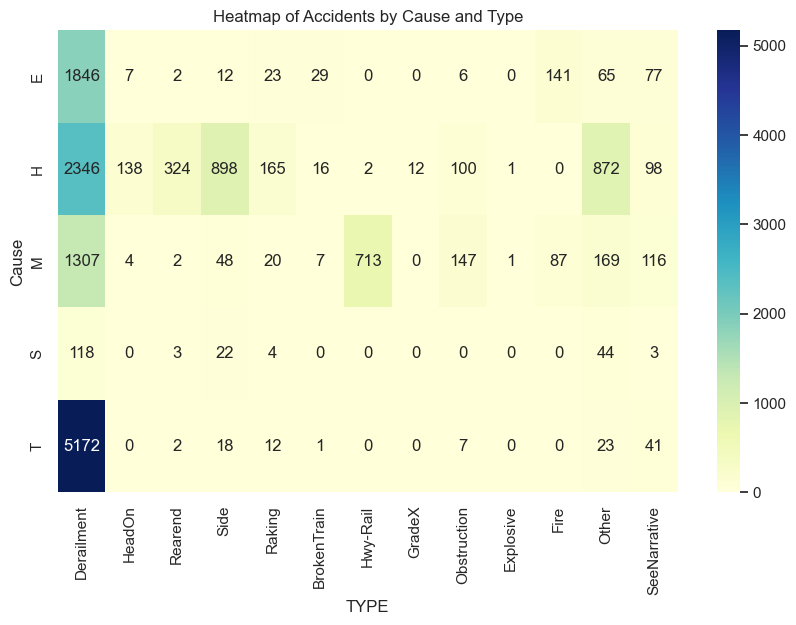

In [7]:
# Heatmap of accidents by Cause and Type
plt.figure(figsize=(10,6))
sns.heatmap(cause_type_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Accidents by Cause and Type')
plt.show()